# Table of contents <a id = "index">

#### [Importing Libraries](#import)

#### [Helper Functions](#functions)
- [Histogram](#hist)

#### [Importing Dataset](#data)
#### [Modeling](#modeling)

### Importing Libraries  
#### [Index](#index)
<a id="import">

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

### Helper Functions <a id='functions'>
#### [Index](#index)

---
#### Histogram <a id = "hist">

In [91]:
def distribution(df, feature, bins = 50, kde = True, hue = None):
    
    """Plots histogram with kde and skewness value;
    
    Params: 
    
    df -> (dataframe) : Source dataset to plot histogram ;
    feature -> (str) : Name of feature ;
    bins -> (int) : Number of bins to plot (Default = 50) ;
    kde -> (bool) : Kernel Density Function (Default = True) """
    
    sns.histplot(data = df, x = feature, bins = bins, kde = kde, hue = hue)
    plt.title(f"Skewness: {round(df[feature].skew(), 4)}")

### Importing Dataset <a id='data'>
#### [Index](#index)

In [92]:
customer_data = pd.read_csv('C:\\Users\\Govind\\OneDrive\\Desktop\\Customer Segmentation\\Mall_Customers.csv')
customer_data.shape

(200, 5)

In [93]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- No values are null
- **Four** numerical and **one** categorical features

In [94]:
customer_data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
99,100,Male,20,61,49
118,119,Female,51,67,43
38,39,Female,36,37,26
111,112,Female,19,63,54
46,47,Female,50,40,55


In [95]:
customer_data.drop('CustomerID',axis=1 ,inplace=True)
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [96]:
customer_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


- Feature `Age` and `Annual Income` are assumed to be in gaussian distribution as **mean** and **median** are close in values
- Observing distribution by histogram plots:

In [97]:
features = [feature for feature in customer_data.columns if customer_data[feature].dtype != 'object']
features

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

CPU times: total: 0 ns
Wall time: 0 ns


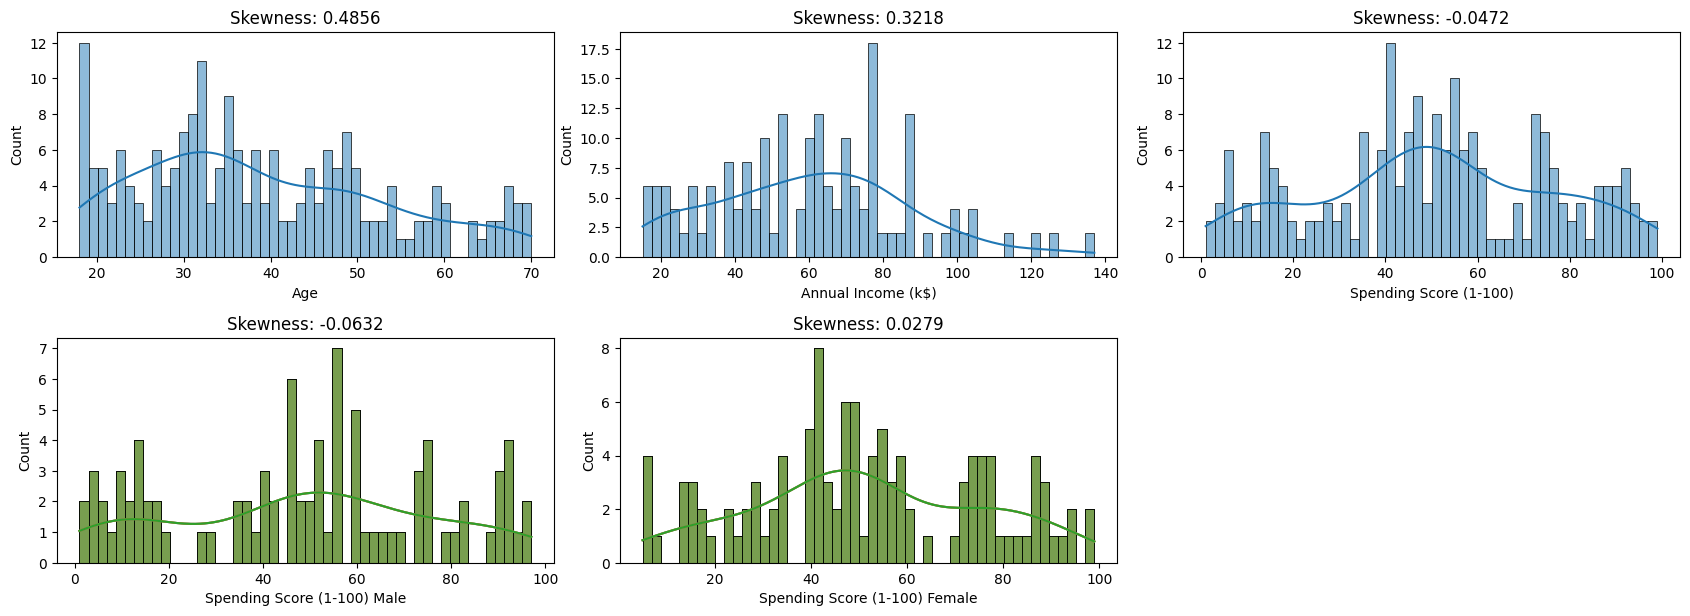

In [98]:
%time
plt.figure(figsize = (17,15))

for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    distribution(customer_data, feature)
    
    plt.subplot(5,3,4)
    distribution(customer_data[customer_data['Gender'] == 'Male'], 'Spending Score (1-100)')
    plt.xlabel("Spending Score (1-100) Male")
    plt.subplot(5,3,5)
    distribution(customer_data[customer_data['Gender'] == 'Female'], 'Spending Score (1-100)')
    plt.xlabel("Spending Score (1-100) Female")
    
plt.tight_layout()

CPU times: total: 0 ns
Wall time: 0 ns


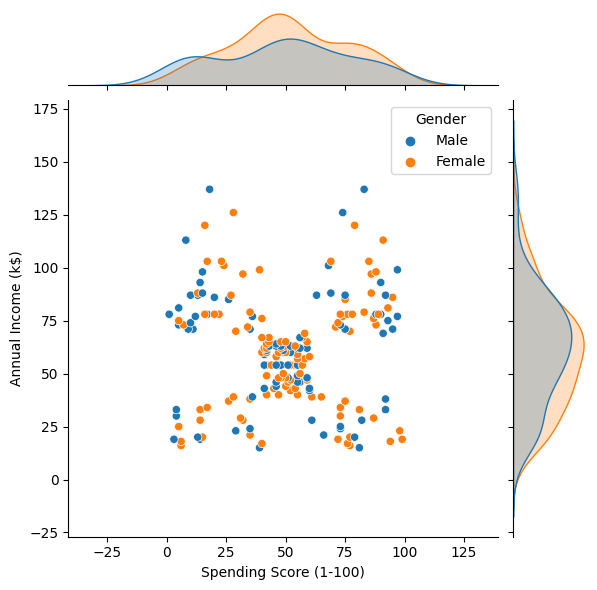

In [99]:
%time
sns.jointplot(data = customer_data, x = 'Spending Score (1-100)', y = 'Annual Income (k$)' , hue = 'Gender')
plt.show()

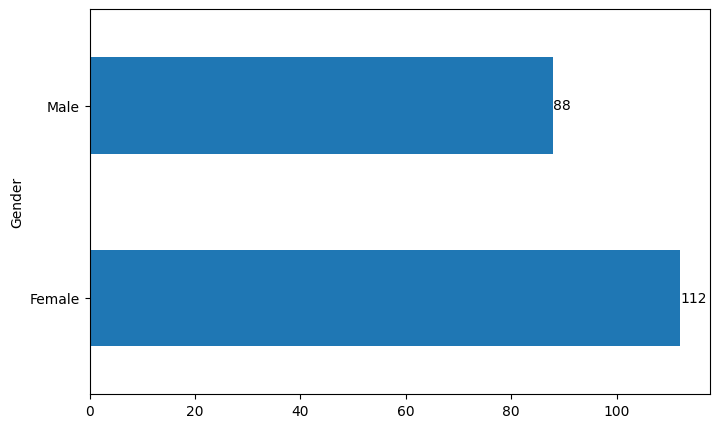

In [100]:
plt.figure(figsize=(8,5))
ax = customer_data['Gender'].value_counts().plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i)

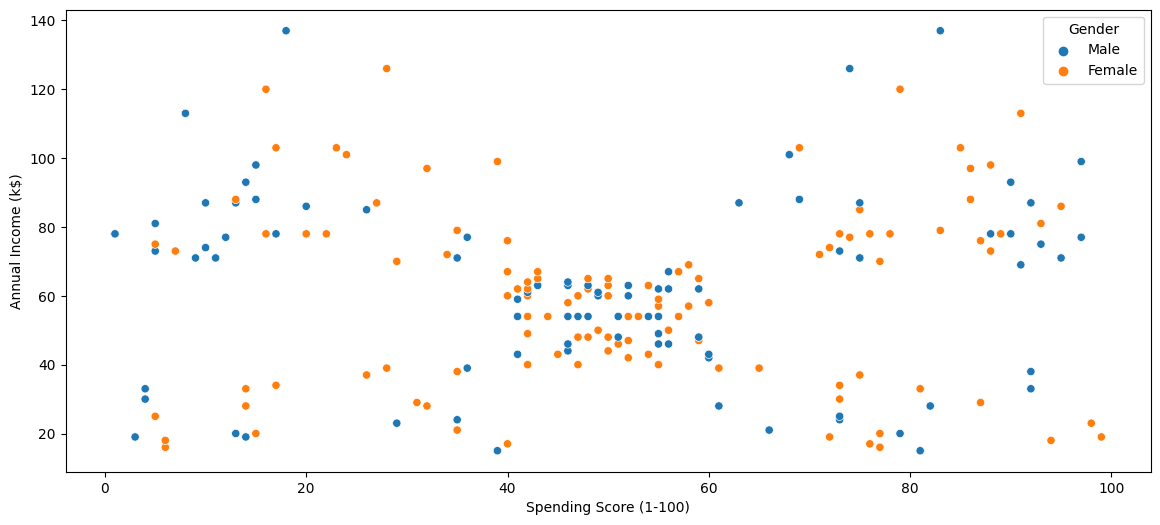

In [101]:
plt.figure(figsize=(14,6))
fig = sns.scatterplot(data=customer_data, x = "Spending Score (1-100)",y = "Annual Income (k$)", hue='Gender')
plt.show()

### Modeling <a id = "modeling">
#### [Index](#index)

In [102]:
df = customer_data.iloc[:,1:]
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [103]:
scaler = StandardScaler()

In [104]:
dfs = scaler.fit_transform(df)

In [105]:
dfs[:10]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002]])

In [106]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(init = "k-means++", n_clusters = i, random_state=42)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)

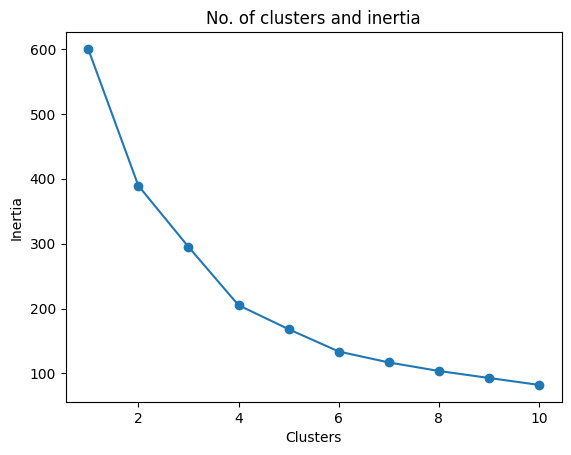

In [107]:
plt.plot(range(1,11), inertia, marker = 'o')
plt.title("No. of clusters and inertia")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

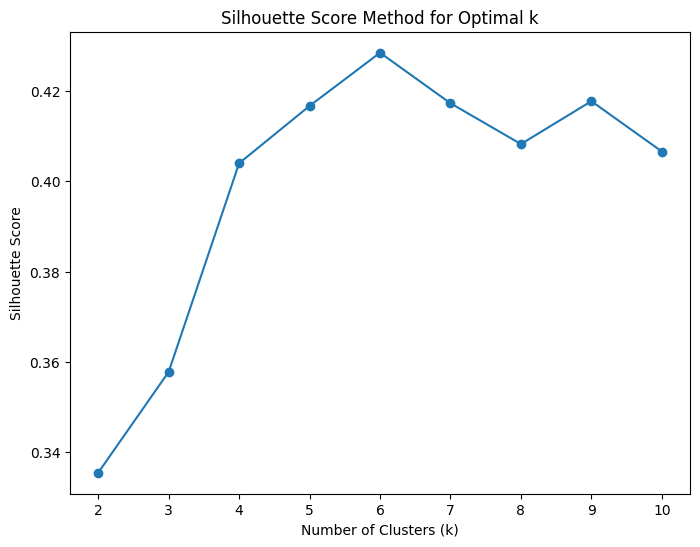

In [108]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(dfs)
    silhouette_scores.append(silhouette_score(dfs, labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.show()

#### Selecting **6** as the optimal cluster size

In [109]:
clusterNum = 6
kmeans = KMeans(n_clusters = clusterNum)
kmeans.fit(dfs)

KMeans(n_clusters=6)

In [110]:
labels = kmeans.labels_
print(labels)

[4 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 0 4 5 4 5 4 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 3 1 3 2 3 2 3 2 3 1 3 1 3 2 3 1 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [111]:
slabel = labels.astype('str')

In [112]:
centroids = kmeans.cluster_centers_

In [113]:
fig = px.scatter(data_frame=dfs, x=dfs[:, 0], y=dfs[:, 1],
                 color_continuous_scale = 'darkmint', color = slabel,
                 labels={'size':'cluster', 'x':'Age', 'y':'Annual Income (k$)', 'color':'Cluster'},
                 hover_data={'Gender':customer_data['Gender'], 'Age':customer_data['Age'], 'Annual Income (k$)':customer_data['Annual Income (k$)']}, title='Clusters with Age by Income')


fig.add_scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers', marker=dict(size=10, symbol='x', color='black'), name='Centroids')
fig

In [114]:
fig = px.scatter(data_frame=dfs, x=dfs[:, 1], y=dfs[:, 2],
                 color_continuous_scale = 'darkmint', color = slabel,
                 labels={'size':'cluster', 'x':'Annual Income (k$)', 'y':'Spending Score (1-100)', 'color':'Cluster'},
                 hover_data={'Gender':customer_data['Gender'], 'Annual Income (k$)':customer_data['Annual Income (k$)'], 'Spending Score (1-100)':customer_data['Spending Score (1-100)']},
                 title='Clusters with Income by Spending Score')


fig.add_scatter(x=centroids[:, 1], y=centroids[:, 2], mode='markers', marker=dict(size=10, symbol='x', color='black'), name='Centroids')
fig

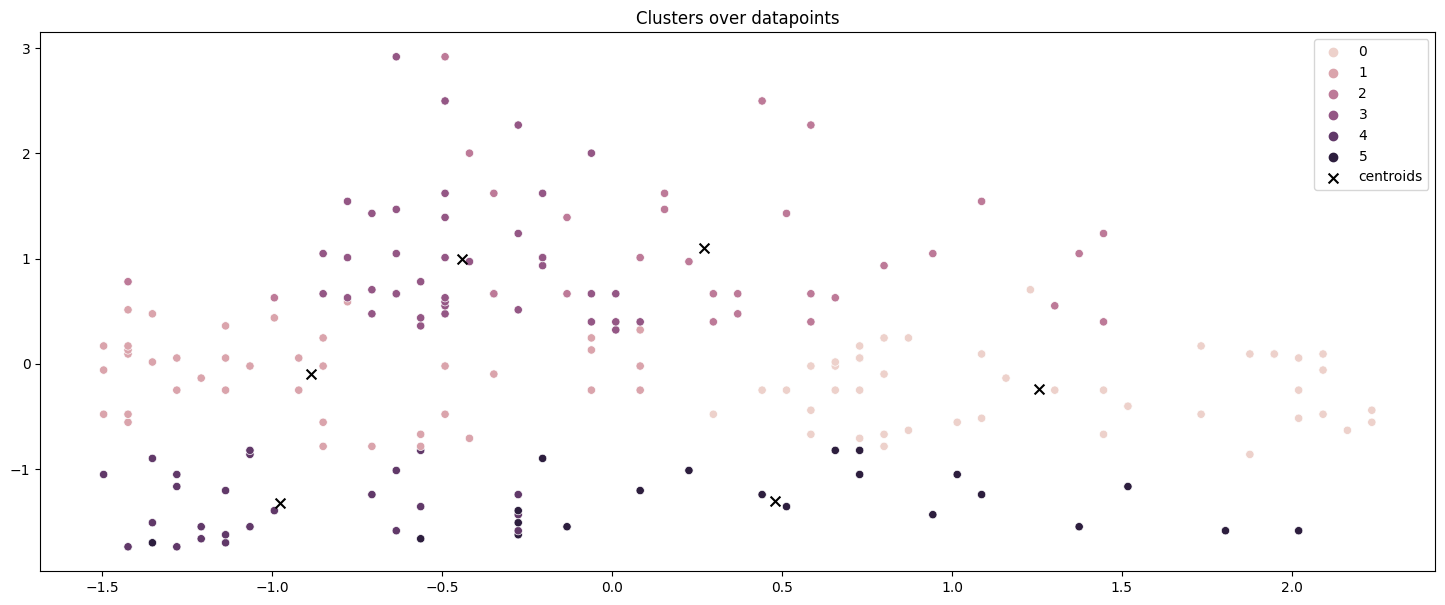

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dfs contains your data with columns you want to use for x and y coordinates.
# Replace 'x_column_name' and 'y_column_name' with the actual column names.
x_data = dfs[:,0]
y_data = dfs[:,1]

plt.figure(figsize=(18, 7))
sns.scatterplot(x=x_data, y=y_data, hue=labels)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], marker='x', color='k', s=50, label="centroids")
plt.title("Clusters over datapoints")
plt.legend()
plt.show()


---

In [116]:
df['label'] = labels

In [117]:
import pandas as pd

grps = df.groupby('label')[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].agg({
    'Age': 'mean',
    'Spending Score (1-100)': 'mean',
    'Annual Income (k$)': 'mean',
    'Age': 'min',
    'Spending Score (1-100)': 'min',
    'Annual Income (k$)': 'min',
    'Age': 'max',
    'Spending Score (1-100)': 'max',
    'Annual Income (k$)': 'max',
    'Age': 'median',
    'Spending Score (1-100)': 'median',
    'Annual Income (k$)': 'median'
})
grps.reset_index(inplace=True)


In [118]:
grps

,label,Age,Spending Score (1-100),Annual Income (k$)
0,0,54.0,49.0,54.0
1,1,26.0,49.0,60.0
2,2,43.0,16.0,86.5
3,3,32.0,83.0,79.0
4,4,23.5,76.5,24.5
5,5,46.0,15.0,25.0


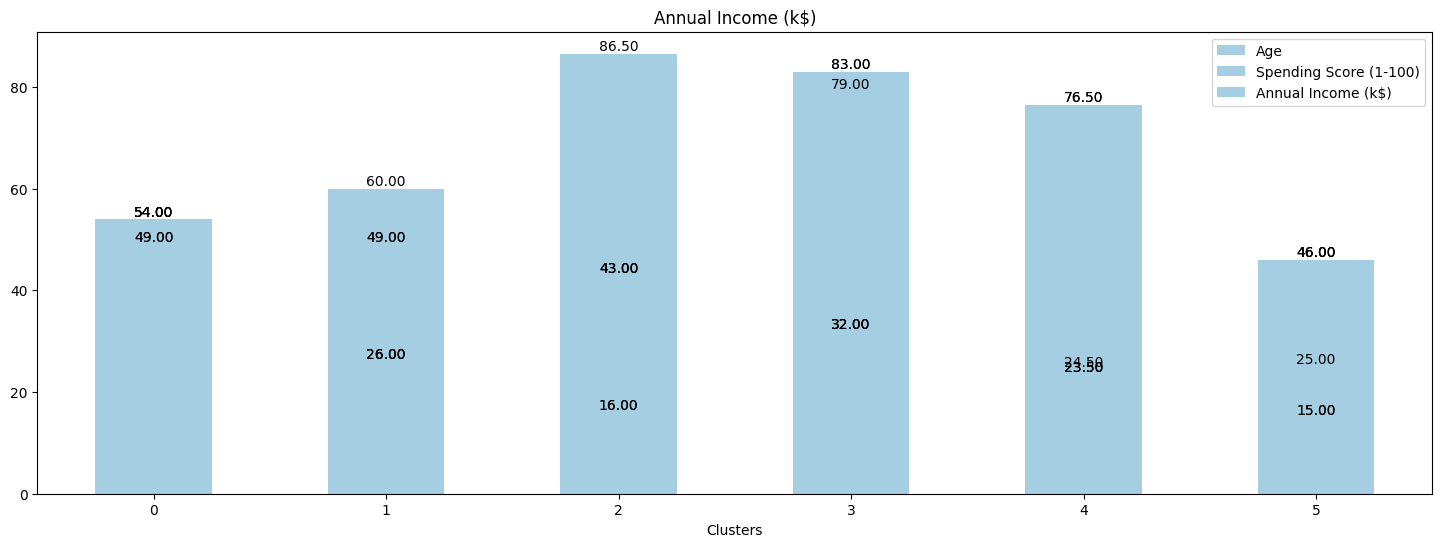

In [119]:
for feature in ['Age','Spending Score (1-100)', 'Annual Income (k$)']:
    
    ax = grps[feature].plot(kind='bar', figsize=(18,6), xlabel='Clusters', colormap='Paired', rot=0, title = f'{feature}')
    ax.legend(loc='best')
    for i in ax.containers:
        ax.bar_label(i, fmt='%0.2f', size=10)

---
### Predictive function

In [120]:
def Predict(INPUT):
    sample = np.array(INPUT)
    sample = sample.reshape(1, -1)
    result = kmeans.predict(sample)
    return result

In [121]:
AGE = 18
INCOME = 130
SPENDING_SCORE = 45
INPUT = [AGE, INCOME, SPENDING_SCORE]

In [122]:
AGE = 50
INCOME = 2000
SPENDING_SCORE = 850
INPUT = [AGE, INCOME, SPENDING_SCORE]


In [123]:
print(f'Assigned Cluster: {Predict(INPUT)}')

Assigned Cluster: [3]
